# Akmal Tanjung (11160940000054)

# Import Moduls 

In [1]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('bmh'); sns.set()

# Import data excel

In [3]:
ps4games_sales = pd.read_excel('C:/Users/asus/Downloads/PS4GamesSales.xlsx')
ps4games_sales.dtypes

Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

In [4]:
ps4games_sales.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


# Deskripsi data

In [6]:
ps4games_sales.describe(include='all')

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
count,723,721.000000,723,721,723.000000,723.000000,723.000000,723.000000,723.000000
unique,723,NaN,17,124,NaN,NaN,NaN,NaN,NaN
top,Legend of Kay,NaN,Action,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,177,54,NaN,NaN,NaN,NaN,NaN
mean,NaN,2015.955617,NaN,NaN,0.292628,0.355671,0.048105,0.127303,0.823804
std,NaN,1.168201,NaN,NaN,0.654577,0.919064,0.126877,0.290033,1.839390
min,NaN,2013.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2015.000000,NaN,NaN,0.020000,0.000000,0.000000,0.010000,0.050000
50%,NaN,2016.000000,NaN,NaN,0.070000,0.050000,0.010000,0.020000,0.160000
75%,NaN,2017.000000,NaN,NaN,0.230000,0.300000,0.050000,0.100000,0.690000


dari deskripsi data di atas kita mendapatkan beberapa info yaitu:
1. Nilai count pada kolom Year dan Publisher tidak sama dengan jumlah baris data maka berarti adanya missing value
2. Kolom Genre dan Publisher merupakan data kategorik

# mengubah tipe data menjadi data kategorik

In [7]:
for i in ['Genre', 'Publisher']:
    ps4games_sales[i] = ps4games_sales[i].astype('category')
ps4games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
Game             723 non-null object
Year             721 non-null float64
Genre            723 non-null category
Publisher        721 non-null category
North America    723 non-null float64
Europe           723 non-null float64
Japan            723 non-null float64
Rest of World    723 non-null float64
Global           723 non-null float64
dtypes: category(2), float64(6), object(1)
memory usage: 47.8+ KB


# Mengecek Missing Value

In [9]:
print('baris dengan missing value di kolom "Year" sebanyak : %d baris'%len(ps4games_sales[ps4games_sales.Year.isna()]))
print('baris dengan missing value di kolom "Publisher" sebanyak : %d baris'%len(ps4games_sales[ps4games_sales.Publisher.isna()]))

baris dengan missing value di kolom "Year" sebanyak : 2 baris
baris dengan missing value di kolom "Publisher" sebanyak : 2 baris


# Exploratory Data Anlysis

In [10]:
ps4games_sales.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,721.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,2015.955617,0.292628,0.355671,0.048105,0.127303,0.823804
std,1.168201,0.654577,0.919064,0.126877,0.290033,1.839390
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.020000,0.000000,0.000000,0.010000,0.050000
50%,2016.000000,0.070000,0.050000,0.010000,0.020000,0.160000
75%,2017.000000,0.230000,0.300000,0.050000,0.100000,0.690000
max,2018.000000,6.180000,9.710000,2.170000,3.020000,19.390000


dari mendeskripsikan data di atas kita mengetahui bahwa :
1. penjualan games ps 4 dari tahun 2013-2018
2. rata rata penjualan games ps 4 paling tinggi di seluruh dunia
3. diantara amerika utara,eropa,jepang, selain ketiga negara di atas dan seluruh dunia rata rata penjualan terbanyak terdapat di seluruh dunia
4. rata rata penjualan games ps 4 di seluruh dunia yaitu 823.804 penjualan
5. penjualan games ps 4 paling banyak yaitu 19.390.000 penjualan serta terdikit yaitu 2.170.000 penjualan

In [11]:
ps4games_sales.head(5)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


# Penjualan games ps 4 paling banyak yaitu games dengan genre Action dengan dilihat dari 5 teratas

apakah games ps 4 dengan genre action paling banyak diproduksi?

# Produksi games Ps 4 bergenre Action

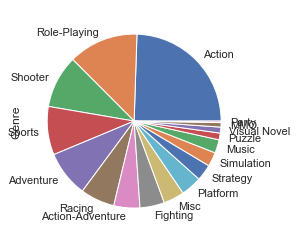

In [13]:
p = ps4games_sales.Genre.value_counts().plot(kind='pie')

berdasarkan visualisasi data menggunakan pie chart kita dapat bahwa produksi games Ps 4 bergenre Action paling banyak diantara genre yang lain

# Memisahkan Missing Value

In [15]:
tahun_na = ps4games_sales[ps4games_sales.Year.isna()]
tahun = ps4games_sales[ps4games_sales.Year.isna()==False]

# Produksi Games Ps 4 per tahun

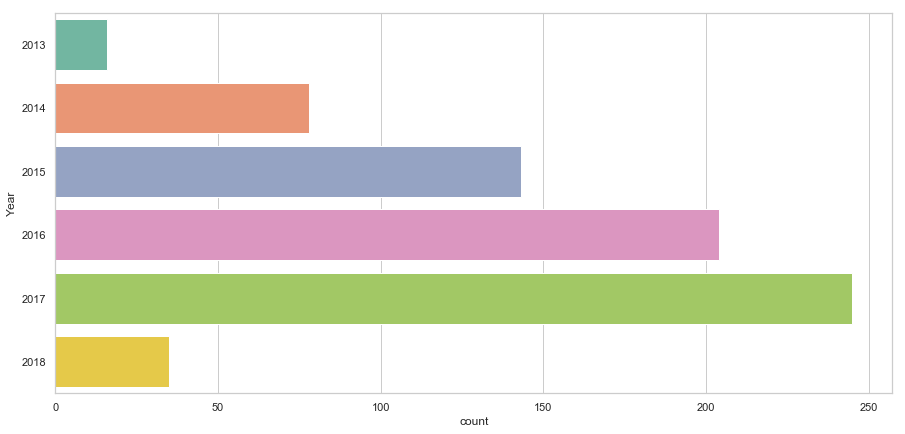

Data missing value pada kolom Year sebanyak 2


In [39]:
plt.figure(figsize=(15,7))
sns.countplot(y=tahun.Year,order=list(range(2013,2019)),palette='Set2')
plt.show()
print('Data missing value pada kolom Year sebanyak %d'%len(tahun_na))

produksi terbanyak ada pada tahun 2017 dan mengalami penurunan pada tahun 2018

In [26]:
l_jpt=[]
for i in range(2013,2019):
    jpt = sum(ps4games_sales['Global'][ps4games_sales.Year==i])
    l_jpt.append(jpt)

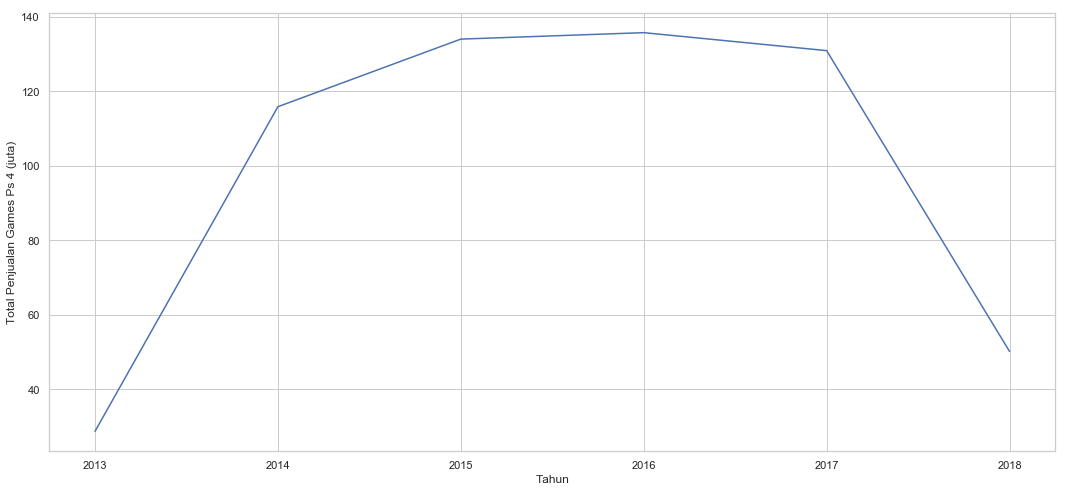

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(y=l_jpt,x=list(range(2013,2019)))
plt.ylabel('Total Penjualan Games Ps 4 (juta)')
plt.xlabel('Tahun')
plt.tight_layout()
plt.show()

Dari grafik di atas dapat dilihat total penjualan games 4 mengalami kenaikan pesat dari tahun 2013-2016, mengalami penurunan pada tahun 2016-2017 dan penurunan sangat pesat pada tahun 2017-2018

# apakah ada hubungan total penjualan pada daerah amerika utara, eropa dan jepang?

# Penjualan antara 3 negara yang terdapat di data

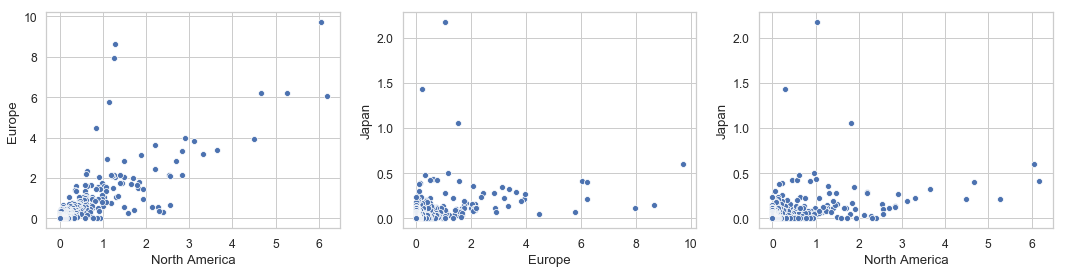

In [30]:
sales_3n = ps4games_sales[['North America','Europe','Japan']]
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.scatterplot(data=sales_3n,x='North America',y='Europe')
plt.subplot(132)
sns.scatterplot(data=sales_3n,x='Europe',y='Japan')
plt.subplot(133)
sns.scatterplot(data=sales_3n,x='North America',y='Japan')
plt.tight_layout()
plt.show()

Terlihat ada data yang letaknya jauh dari sebaran data (dicurigai outlier) sehingga data tidak tersebar dengan rata, maka data (yang diduga) outlier akan dipisahkan

## memisahkan data yang diduga outlier

In [31]:
sales_nout = pd.DataFrame()
sales_out = pd.DataFrame()
for i in sales_3n.columns:
    Q1 = sales_3n[i].quantile(0.25)
    Q3 = sales_3n[i].quantile(0.75)
    IQR = Q3-Q1
    sales_nout[i] = sales_3n[i][~((sales_3n[i] < (Q1 - 1.5 * IQR)) |(sales_3n[i] > (Q3 + 1.5 * IQR)))]
    sales_out[i] = sales_3n[i][(sales_3n[i] < (Q1 - 1.5 * IQR)) |(sales_3n[i] > (Q3 + 1.5 * IQR))]

## Plot data yang dipisahkan dari outlier

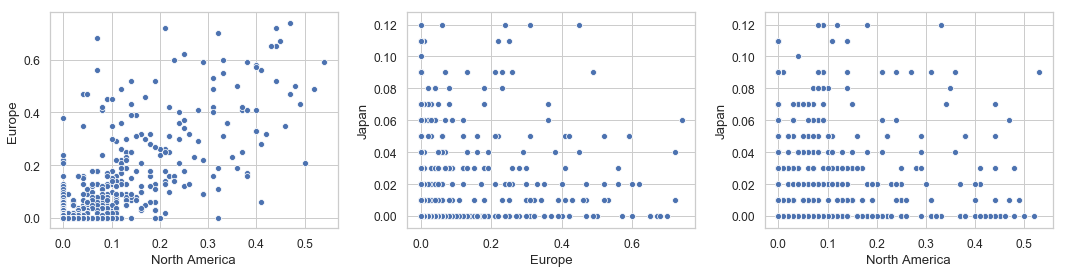

In [32]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.scatterplot(data=sales_nout,x='North America',y='Europe')
plt.subplot(132)
sns.scatterplot(data=sales_nout,x='Europe',y='Japan')
plt.subplot(133)
sns.scatterplot(data=sales_nout,x='North America',y='Japan')
plt.tight_layout()
plt.show()

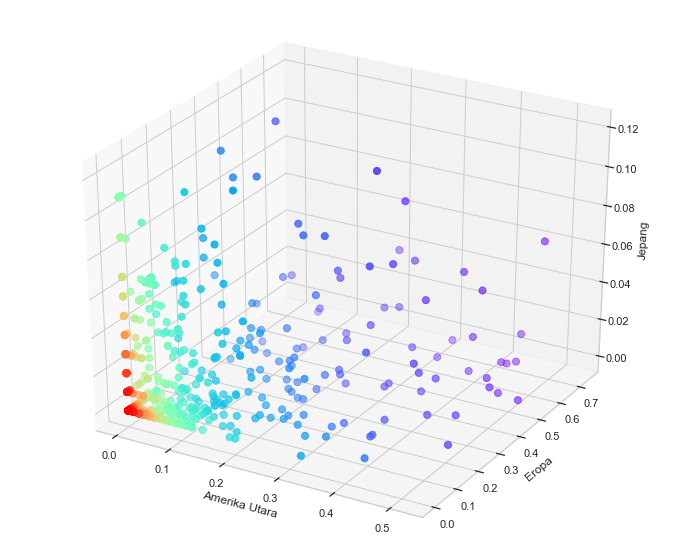

In [33]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = sales_nout['North America']
y = sales_nout['Europe']
z = sales_nout['Japan']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Amerika Utara')
ax.set_ylabel('Eropa')
ax.set_zlabel('Jepang')
plt.show()

Titik menyebar ke seluruh area dalam plot artinya sangat kecil hubungan antara penjualan di Amerika Utara, Eropa dan Jepang

## Kesimpulan
1. Data non outlier menunjukkan bahwa kecil hubungan data penjualan Amerika Utara, Eropa, dan Jepang
2. Genre Ps 4 Paling banyak diminati pada tahun 2013-2018 adalah Action